<a href="https://colab.research.google.com/github/DemonHunterz9/DL/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



# Implementing feedforward neural networks with Keras and TensorFlow
# import the necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



In [ ]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)

print("[INFO] accessing MNIST...")
(x_train, y_train_original), (x_test, y_test_original) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

[INFO] accessing MNIST...


In [ ]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_original, num_classes=10)


# Each data point in the MNIST dataset has an integer label in the range [0, 9], one for each of the possible ten digits in the MNIST dataset.
# A label with a value of 0 indicates that the corresponding image contains a zero digit. Similarly, a label with a value of 8 indicates
# that the corresponding image contains the number eight.

In [ ]:
# Step 3: Define the network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
H = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6122 - loss: 1.2771 - val_accuracy: 0.9026 - val_loss: 0.3333
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9071 - loss: 0.3159 - val_accuracy: 0.9295 - val_loss: 0.2400
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9282 - loss: 0.2414 - val_accuracy: 0.9362 - val_loss: 0.2082
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9390 - loss: 0.2086 - val_accuracy: 0.9455 - val_loss: 0.1810
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9469 - loss: 0.1833 - val_accuracy: 0.9429 - val_loss: 0.1767
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9524 - loss: 0.1602 - val_accuracy: 0.9549 - val_loss: 0.1547
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9576 - loss: 0.1401 - val_accuracy: 0.9567 - val_loss: 0.1454
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9613 - loss: 0.1347 - 

In [ ]:
# Step 6: Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9618 - loss: 0.1227
Test accuracy: 96.74%


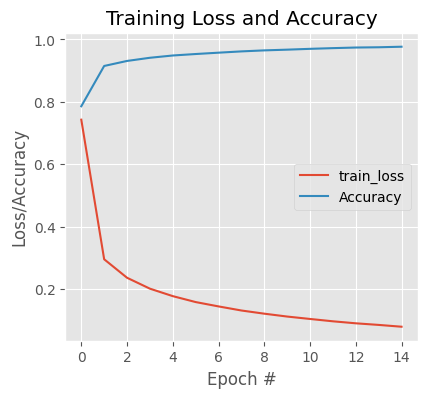

In [ ]:
# Step 7: Plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label="train_loss")
plt.plot(H.history['accuracy'], label="Accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
